In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.style.use('~/Python_Tool/ryan_mplstyle.mplstyle')

import numpy as np

import h5py
import cmocean.cm as cmo
import dedalus.public as d3
from scipy.stats import skew

import sys
sys.path.insert(0, '../../subroutines')
from isospectrum import isospectrum

In [2]:
Ro = 0.0
nun2 = 1

dgname = 'EadyQGPl_dg_%.3f_%d/EadyQGPl_dg_%.3f_%d_s%i' %(Ro, nun2, Ro, nun2, 1)
dgname = dgname.replace(".", "d" ); dgname = "../"+dgname+'.h5'

with h5py.File(dgname, mode='r') as file:
    KE_QGdata = np.squeeze(np.array(file['tasks']['KE']))
    dg_time_ary = np.array(file['scales']['sim_time'])

spname = 'EadyQGPl_sp_%.3f_%d/EadyQGPl_sp_%.3f_%d_s%i' %(Ro, nun2, Ro, nun2, int((dg_time_ary[-1]-1)/10+1)-2 )
spname = spname.replace(".", "d" ); spname = "../"+spname+'.h5'

with h5py.File(spname, mode='r') as file:
    bt_QGdata = np.squeeze(np.array(file['tasks']['b_top']))
    zetat_QGdata = np.squeeze(np.array(file['tasks']['zeta_top']))*0.032
    divt_QGdata = np.squeeze(np.array(file['tasks']['div_top']))*0.032
    straint_QGdata = np.squeeze(np.array(file['tasks']['strain_top']))*0.032

In [3]:
Ro = 0.032
nun2 = 3

dgname = 'EadyQGPl_dg_%.3f_%d/EadyQGPl_dg_%.3f_%d_s%i' %(Ro, nun2, Ro, nun2, 1)
dgname = dgname.replace(".", "d" ); dgname = "../"+dgname+'.h5'

with h5py.File(dgname, mode='r') as file:
    KE_data = np.squeeze(np.array(file['tasks']['KE']))
    PE_data = np.squeeze(np.array(file['tasks']['PE']))
    avgbt_data = np.squeeze(np.array(file['tasks']['avgbt']))
    avgbb_data = np.squeeze(np.array(file['tasks']['avgbb']))
    
#     avgvt_data = np.squeeze(np.array(file['tasks']['avgvt']))
#     avgdivbt_data = np.squeeze(np.array(file['tasks']['avgdivbt']))
    
    dg_time_ary = np.array(file['scales']['sim_time'])
    print(dg_time_ary[-10:-1])

spname = 'EadyQGPl_sp_%.3f_%d/EadyQGPl_sp_%.3f_%d_s%i' %(Ro, nun2, Ro, nun2, int((dg_time_ary[-1]-1)/10+1)-2 )
spname = spname.replace(".", "d" ); spname = "../"+spname+'.h5'

with h5py.File(spname, mode='r') as file:
    bt_data = np.squeeze(np.array(file['tasks']['b_top']))
    bb_data = np.squeeze(np.array(file['tasks']['b_bot']))
    P0y_data = np.squeeze(np.array(file['tasks']['P0_yslc']))
    zetat_data = np.squeeze(np.array(file['tasks']['zeta_top']))*0.032
    divt_data = np.squeeze(np.array(file['tasks']['div_top']))*0.032
    straint_data = np.squeeze(np.array(file['tasks']['strain_top']))*0.032
#     ut_data = np.squeeze(np.array(file['tasks']['u_top']))
#     vt_data = np.squeeze(np.array(file['tasks']['v_top']))
    P0z_data = np.squeeze(np.array(file['tasks']['P0_zslc']))
#     P1z_data = np.squeeze(np.array(file['tasks']['P1_zslc']))
    print(bt_data.shape)
    print(P0y_data.shape)
    
    sim_time_ary = np.array(file['scales']['sim_time'])
    print(sim_time_ary)
    
    x = np.array(file['scales'][list(file['scales'])[-3]])
    y = np.array(file['scales'][list(file['scales'])[-2]])
    z = np.array(file['scales'][list(file['scales'])[-1]])  

[198.99866914 199.10073773 199.20065131 199.29987792 199.40125036
 199.4988012  199.60126648 199.70123161 199.80018468]
(10, 512, 512)
(10, 512, 32)
[169.99995252 171.00080556 172.00031552 172.99980055 173.99910859
 175.00082675 176.00037732 177.00117627 177.99899597 178.99899146]


In [4]:
Nx, Ny = bt_data.shape[2], bt_data.shape[2]
L = x[-1]/(Nx-1)*Nx

time_idx = -5

/state/partition1/job-40735254/ipykernel_560363/3700576911.py:32: MatplotlibDeprecationWarning: The toggle_label function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use ax.tick_params and colorbar.set_label instead.
  grid[1].cax.toggle_label(True)


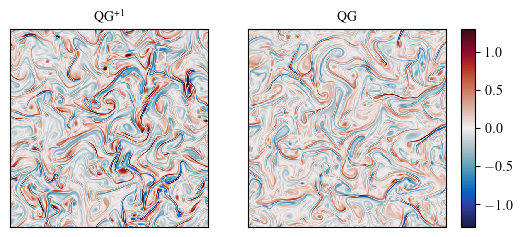

In [5]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(6, 2.6))
# fig = plt.figure(figsize=(6*3, 2.6*3))

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.4,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )

clim = 1.3

im0 = grid[0].pcolormesh(x,y,zetat_data[time_idx,:,:].T, cmap=cmo.balance, vmin=-clim, vmax=clim)
grid[0].set_aspect('equal')
grid[0].set_xticks([])
grid[0].set_yticks([])
grid[0].set_title("QG$\\textsuperscript{+1}$")

im1 = grid[1].pcolormesh(x,y,zetat_QGdata[time_idx,:,:].T, cmap=cmo.balance, vmin=-clim, vmax=clim)
grid[1].set_aspect('equal')
grid[1].set_xticks([])
grid[1].set_yticks([])
grid[1].set_title("QG")

# Colorbar
grid[1].cax.colorbar(im1)
grid[1].cax.toggle_label(True)

figname = 'figs/EadyQGpl_zeta_snap_t%.1f' %(sim_time_ary[time_idx])
figname = figname.replace(".", "d" ); figname = figname+'.png'
plt.savefig(figname, bbox_inches='tight', dpi=800)

/state/partition1/job-40735254/ipykernel_560363/3213221126.py:27: MatplotlibDeprecationWarning: The toggle_label function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use ax.tick_params and colorbar.set_label instead.
  grid[1].cax.toggle_label(True)


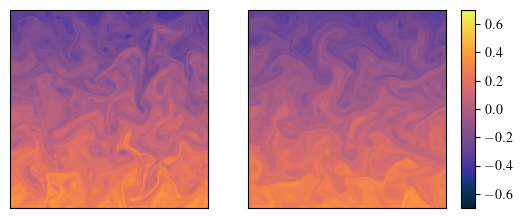

In [6]:
fig = plt.figure(figsize=(6, 2.6))

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.4,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )

clim = 0.7

im0 = grid[0].pcolormesh(x,y,Ro*(bt_data[time_idx,:,:]-(y-L/2)).T, cmap=cmo.thermal, vmin=-clim, vmax=clim)
grid[0].set_aspect('equal')
grid[0].set_xticks([])
grid[0].set_yticks([])

im1 = grid[1].pcolormesh(x,y,Ro*(bt_QGdata[time_idx,:,:]-(y-L/2)).T, cmap=cmo.thermal, vmin=-clim, vmax=clim)
grid[1].set_aspect('equal')
grid[1].set_xticks([])
grid[1].set_yticks([])

# Colorbar
grid[1].cax.colorbar(im1)
grid[1].cax.toggle_label(True)

figname = 'figs/EadyQGpl_b_snap_t%.1f' %(sim_time_ary[time_idx])
figname = figname.replace(".", "d" ); figname = figname+'.png'
# plt.savefig(figname, bbox_inches='tight', dpi=800)

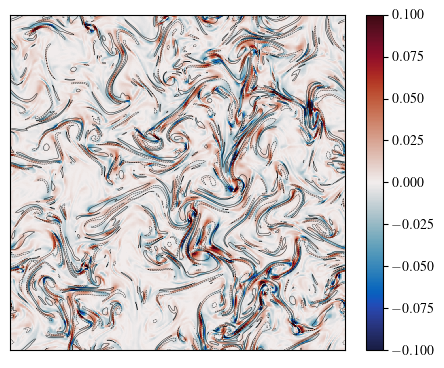

In [7]:
fig=plt.figure(figsize=(5.4, 4.36))
# fig=plt.figure(figsize=(5.4*2, 4.36*2))

plt.contour(x,y,zetat_data[time_idx,:,:].T, [-0.35, 0.35], colors='black', linewidths=0.3)
clim = 0.1; plt.pcolormesh(x,y,divt_data[time_idx,:,:].T, cmap=cmo.balance, vmin=-clim, vmax=clim)

plt.colorbar()
plt.axis('equal')
plt.xticks([])
plt.yticks([])

figname = 'figs/EadyQGpl_zetadiv_snap_Ro%.2f_t%.1f' %(Ro, sim_time_ary[time_idx])
figname = figname.replace(".", "d" ); figname = figname+'.png'
plt.savefig(figname, bbox_inches='tight', dpi=800)

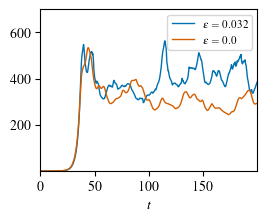

In [8]:
fig=plt.figure(figsize=(2.8, 2.1))

plt.plot(dg_time_ary,KE_data,label="$\epsilon=0.032$")
plt.plot(dg_time_ary,KE_QGdata,label="$\epsilon=0.0$")
# plt.title("Kinetic energy")
plt.xlabel("$t$")
plt.legend()
plt.ylim([2e-2,700])

figname = 'figs/EadyQGpl_KE.pdf'
plt.savefig(figname, bbox_inches='tight')

### 

In [9]:
Ro = 0.032
nun2 = 3

bt_all = np.empty([0,512,512])
# bb_all = np.empty([0,512,512])
# bmt_all = np.empty([0,512,512])
# bmm_all = np.empty([0,512,512])
zt_all = np.empty([0,512,512])

for di in range(16,21):
    print(di)
    
    spname = 'EadyQGPl_sp_%.3f_%d/EadyQGPl_sp_%.3f_%d_s%i' %(Ro, nun2, Ro, nun2, di )
    spname = spname.replace(".", "d" ); spname = "../"+spname+'.h5'

    # Plot writes
    with h5py.File(spname, mode='r') as file:
        bt_data = np.squeeze(np.array(file['tasks']['b_top']))
#         bb_data = np.squeeze(np.array(file['tasks']['b_bot']))
#         bmt_data = np.squeeze(np.array(file['tasks']['b_mt']))
#         bmm_data = np.squeeze(np.array(file['tasks']['b_mm']))
        zetat_data = np.squeeze(np.array(file['tasks']['zeta_top']))*0.032
        
        
        bt_all = np.append(bt_all,bt_data,axis=0)
#         bb_all = np.append(bb_all,bb_data,axis=0)
#         bmt_all = np.append(bmt_all,bmt_data,axis=0)
#         bmm_all = np.append(bmm_all,bmm_data,axis=0)
        zt_all = np.append(zt_all,zetat_data,axis=0)

16
17
18
19
20


In [10]:
Ro = 0.0
nun2 = 1

bt_QGall = np.empty([0,512,512])
# bb_QGall = np.empty([0,512,512])
# bmt_QGall = np.empty([0,512,512])
# bmm_QGall = np.empty([0,512,512])
zt_QGall = np.empty([0,512,512])

for di in range(16,21):
    print(di)
    
    spname = 'EadyQGPl_sp_%.3f_%d/EadyQGPl_sp_%.3f_%d_s%i' %(Ro, nun2, Ro, nun2, di )
    spname = spname.replace(".", "d" ); spname = "../"+spname+'.h5'

    # Plot writes
    with h5py.File(spname, mode='r') as file:
        bt_data = np.squeeze(np.array(file['tasks']['b_top']))
#         bb_data = np.squeeze(np.array(file['tasks']['b_bot']))
#         bmt_data = np.squeeze(np.array(file['tasks']['b_mt']))
#         bmm_data = np.squeeze(np.array(file['tasks']['b_mm']))
        zetat_data = np.squeeze(np.array(file['tasks']['zeta_top']))*0.032
        
        bt_QGall = np.append(bt_QGall,bt_data,axis=0)
#         bb_QGall = np.append(bb_QGall,bb_data,axis=0)
#         bmt_QGall = np.append(bmt_QGall,bmt_data,axis=0)
#         bmm_QGall = np.append(bmm_QGall,bmm_data,axis=0)
        zt_QGall = np.append(zt_QGall,zetat_data,axis=0)

16
17
18
19
20


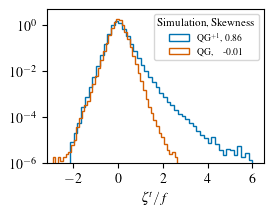

In [11]:
fig=plt.figure(figsize=(2.8, 2.0))

data = zt_all[:,:,:].ravel()
binwidth = (max(data)-min(data))/70
biss = np.arange(min(data), max(data) + binwidth, binwidth)
plt.hist(zt_all[:,:,:].ravel(), log=True, density=True, bins=50, histtype='step',  label="QG$^{+1}$, %.2f" %skew(zt_all[:,:,:].ravel()))

data = zt_QGall[:,:,:].ravel()
plt.hist(zt_QGall[:,:,:].ravel(), log=True, density=True, bins= np.arange(min(data), max(data) + binwidth, binwidth) \
         , histtype='step',  label="QG,$~~~$ %.2f" %skew(zt_QGall[:,:,:].ravel()))

# plt.hist(zetab_all[:,:,:].ravel(), log=True, density=True, bins=50, histtype='step',  label="$\zeta^b/f$, %.2f" %skew(zetab_all[:,:,:].ravel()))
# plt.hist(zetamt_all[:,:,:].ravel()*4, log=True, density=True, bins=50, histtype='step', label=r"$4\times\zeta(z=-H/4)/f$, %.2f" %skew(zetamt_all[:,:,:].ravel()))
# plt.hist(zetamm_all[:,:,:].ravel()*4, log=True, density=True, bins=50, histtype='step', label=r"$4\times\zeta(z=-H/2)/f$, %.2f" %skew(zetamm_all[:,:,:].ravel()))

# plt.title('$\epsilon=%.2f$' %Ro)
# plt.xlabel("$\zeta/f$")
plt.xlim([-3.2,6.5])
plt.ylim([1e-6,5])
plt.xlabel("$\zeta^t/f$")

legend = plt.legend(title="Simulation, Skewness", fontsize=7)
plt.setp(legend.get_title(),fontsize=8)

figname = 'figs/EadyQGpl_zetaPDFs_Ro%.2f' %(Ro)
figname = figname.replace(".", "d" ); figname = figname+'.pdf'
plt.savefig(figname, bbox_inches='tight')
plt.show()

In [12]:
binwidth

0.11874332416432719

In [13]:
# Numerics Parameters
Lx, Ly = L, L

dealias = 3/2
dtype = np.float64

coords = d3.CartesianCoordinates('x', 'y', 'z')
dist = d3.Distributor(coords, dtype=dtype)
xbasis = d3.RealFourier(coords['x'], size=Nx, bounds=(0, Lx), dealias=dealias)
ybasis = d3.RealFourier(coords['y'], size=Ny, bounds=(0, Ly), dealias=dealias)

# Fields
b2d = dist.Field(bases=(xbasis,ybasis) )

In [14]:
temp = np.empty([Nx,Ny,1])
bt2_spec_sum = 0
# bb2_spec_sum = 0
# bmt2_spec_sum = 0
# bmm2_spec_sum = 0

bt2QG_spec_sum = 0
# bb2QG_spec_sum = 0
# bmt2QG_spec_sum = 0
# bmm2QG_spec_sum = 0

for time_i in range(bt_all.shape[0]):
    print(time_i)
# for time_i in [time_idx]:
    temp[:,:,0]=bt_all[time_i,:,:]
    b2d['g'] = temp; mag2d = np.squeeze(b2d['c'])*np.conj(np.squeeze(b2d['c']))
    b2d_spec = isospectrum(mag2d); 
    bt2_spec_sum += b2d_spec
    
#     temp[:,:,0]=bb_all[time_i,:,:]
#     b2d['g'] = temp; mag2d = np.squeeze(b2d['c'])*np.conj(np.squeeze(b2d['c']))
#     b2d_spec = isospectrum(mag2d); 
#     bb2_spec_sum += b2d_spec
    
#     temp[:,:,0]=bmt_all[time_i,:,:]
#     b2d['g'] = temp; mag2d = np.squeeze(b2d['c'])*np.conj(np.squeeze(b2d['c']))
#     b2d_spec = isospectrum(mag2d); 
#     bmt2_spec_sum += b2d_spec
    
#     temp[:,:,0]=bmm_all[time_i,:,:]
#     b2d['g'] = temp; mag2d = np.squeeze(b2d['c'])*np.conj(np.squeeze(b2d['c']))
#     b2d_spec = isospectrum(mag2d); 
#     bmm2_spec_sum += b2d_spec
    
    ####
    temp[:,:,0]=bt_QGall[time_i,:,:]
    b2d['g'] = temp; mag2d = np.squeeze(b2d['c'])*np.conj(np.squeeze(b2d['c']))
    b2d_spec = isospectrum(mag2d); 
    bt2QG_spec_sum += b2d_spec
    
#     temp[:,:,0]=bb_QGall[time_i,:,:]
#     b2d['g'] = temp; mag2d = np.squeeze(b2d['c'])*np.conj(np.squeeze(b2d['c']))
#     b2d_spec = isospectrum(mag2d); 
#     bb2QG_spec_sum += b2d_spec
    
#     temp[:,:,0]=bmt_QGall[time_i,:,:]
#     b2d['g'] = temp; mag2d = np.squeeze(b2d['c'])*np.conj(np.squeeze(b2d['c']))
#     b2d_spec = isospectrum(mag2d); 
#     bmt2QG_spec_sum += b2d_spec
    
#     temp[:,:,0]=bmm_QGall[time_i,:,:]
#     b2d['g'] = temp; mag2d = np.squeeze(b2d['c'])*np.conj(np.squeeze(b2d['c']))
#     b2d_spec = isospectrum(mag2d); 
#     bmm2QG_spec_sum += b2d_spec
    
bt2_spec = bt2_spec_sum/bt_all.shape[0]
# bb2_spec = bb2_spec_sum/bt_all.shape[0]
# bmt2_spec = bmt2_spec_sum/bt_all.shape[0]
# bmm2_spec = bmm2_spec_sum/bt_all.shape[0]

bt2_QGspec = bt2QG_spec_sum/bt_all.shape[0]
# bb2_QGspec = bb2QG_spec_sum/bt_all.shape[0]
# bmt2_QGspec = bmt2QG_spec_sum/bt_all.shape[0]
# bmm2_QGspec = bmm2QG_spec_sum/bt_all.shape[0]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


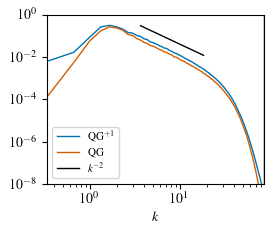

In [15]:
KK = xbasis.wavenumbers[2:-1:2]

fig=plt.figure(figsize=(2.8, 2.2))

plt.loglog(KK,bt2_spec[1:], label="QG$^{+1}$",color=(0,0.4453125,0.6953125))
# plt.loglog(KK,bb2_spec[1:], label="$b^b$",color=(0.83203125,0.3671875,0.))
# plt.loglog(KK,bmt2_spec[1:], label="$b(z=-H/4)$",color=(0.,0.6171875,0.44921875))
# plt.loglog(KK,bmm2_spec[1:], label="$b(z=-H/2)$",color=(0.8984375,0.62109375,0.))

plt.loglog(KK,bt2_QGspec[1:],'-', label="QG",color=(0.83203125,0.3671875,0.))

# plt.loglog(KK,bt2_QGspec[1:]/10,'--', label=r"QG ($\times0.1$)",color=(0.83203125,0.3671875,0.))
# plt.loglog(KK,bb2_QGspec[1:]/10,'--',color=(0.83203125,0.3671875,0.))
# plt.loglog(KK,bmt2_QGspec[1:]/10,'--',color=(0.,0.6171875,0.44921875))
# plt.loglog(KK,bmm2_QGspec[1:]/10,'--',color=(0.8984375,0.62109375,0.))

plt.loglog(KK[10:-200],KK[10:-200]**-(2)*4,'-',color='k', label="$k^{-2}$")
# plt.loglog(KK[5:-240],KK[5:-240]**-(4)/400,'--',color='k', label="$k^{-4}$")

plt.axvline(KK[-1],color='k')
plt.ylim([1e-8,1])
# plt.title('Top bouyancy spectrum')
plt.xlabel("$k$")

plt.legend()

figname = 'figs/EadyQGpl_bspec'
figname = figname.replace(".", "d" ); figname = figname+'.pdf'
plt.savefig(figname, bbox_inches='tight')

plt.show()